<a href="https://colab.research.google.com/github/aricahyasaputra/data-sains-course-assigment-/blob/main/Quiz/Quiz_Minggu_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Kelompok :     
*   Ari Cahya Saputra
*   Salman Al Farisi
   
NIM : 
*   1103190093
*   1103194131

Kelas : TK-42-PIL1


Data set : 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aricahyasaputra/data-sains-course-assigment-/main/Quiz/day_wise.csv")

# melihat dataset
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [3]:
# merangkum data
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [4]:
cdf = df[['Confirmed','Deaths','Recovered','Active']]
cdf.head(10)

,Confirmed,Deaths,Recovered,Active
0,555,17,28,510
1,654,18,30,606
2,941,26,36,879
3,1434,42,39,1353
4,2118,56,52,2010
5,2927,82,61,2784
6,5578,131,107,5340
7,6166,133,125,5908
8,8234,171,141,7922
9,9927,213,219,9495


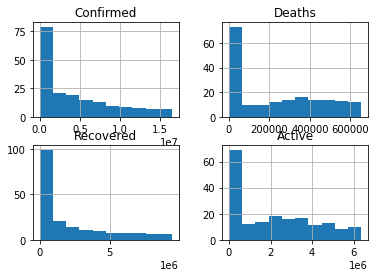

In [5]:
viz = cdf[['Confirmed','Deaths','Recovered','Active']]
viz.hist()
plt.show()

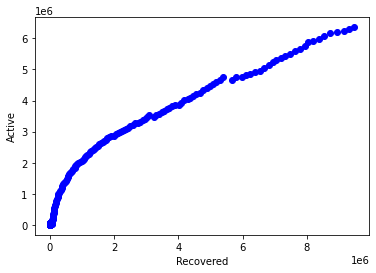

In [6]:
plt.scatter(cdf.Recovered, cdf.Active,  color='blue')
plt.xlabel("Recovered")
plt.ylabel("Active")
plt.show()

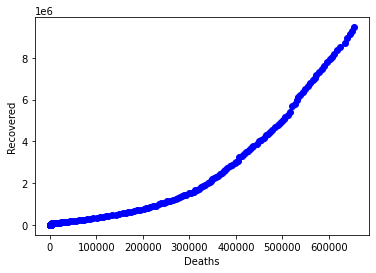

In [7]:
plt.scatter(cdf.Deaths, cdf.Recovered,  color='blue')
plt.xlabel("Deaths")
plt.ylabel("Recovered")
plt.show()

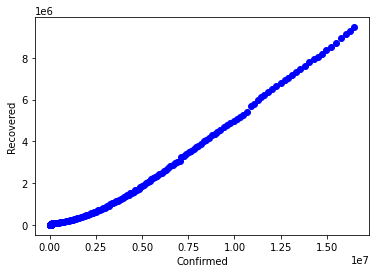

In [8]:
# write your code here
plt.scatter(cdf.Confirmed, cdf.Recovered, color='blue')
plt.xlabel("Confirmed")
plt.ylabel("Recovered")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

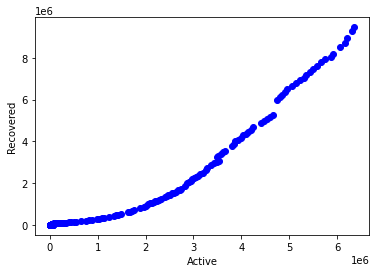

In [10]:
plt.scatter(train.Active, train.Recovered,  color='blue')
plt.xlabel("Active")
plt.ylabel("Recovered")
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Active']])
train_y = np.asanyarray(train[['Recovered']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.27858842]]
Intercept:  [-620971.84243204]


Text(0, 0.5, 'Recovered')

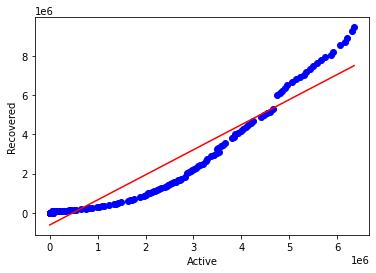

In [12]:
plt.scatter(train.Active, train.Recovered,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Active")
plt.ylabel("Recovered")

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Active']])
test_y = np.asanyarray(test[['Recovered']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 675243.46
Residual sum of squares (MSE): 588506064948.12
R2-score: 0.90
